In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt",
                sep=",", 
                names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


/Users/sumitsaha/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sumitsaha/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/sumitsaha/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/sumitsaha/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

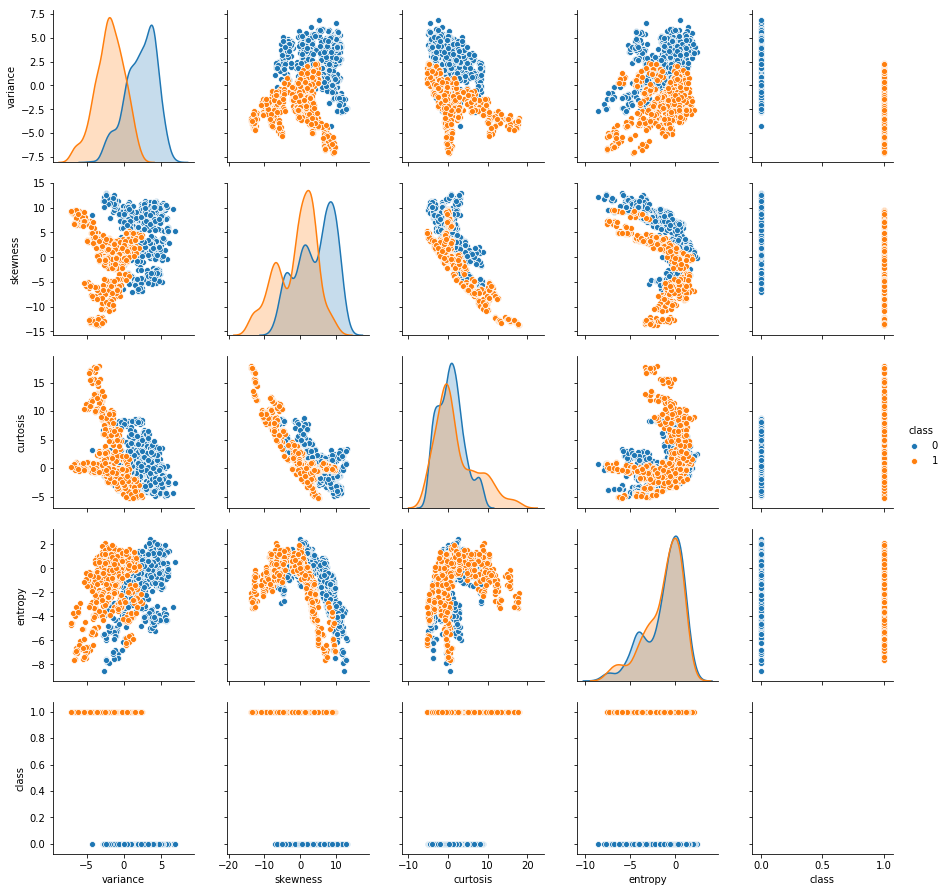

In [3]:
sns.pairplot(df, hue='class')

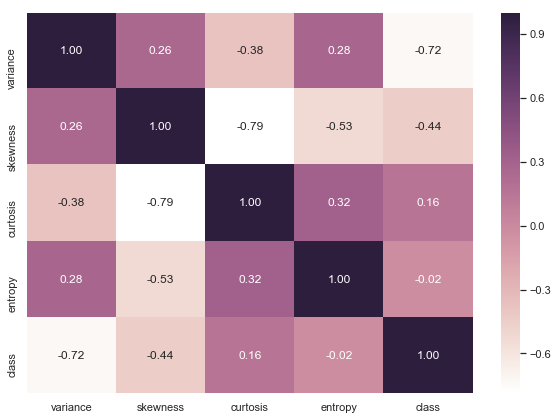

In [4]:
sns.set(rc={'figure.figsize':(10,7)})
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=cmap)

In [5]:
predictors = df.iloc[:, df.columns!='class']
target = df['class']

In [6]:
scaler = MinMaxScaler()
scaler.fit(predictors.values, target.values)
predictors = scaler.fit_transform(predictors.values)
target = target.values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1097, 4)
y_train shape: (1097,)
x_test shape: (275, 4)
y_test shape: (275,)


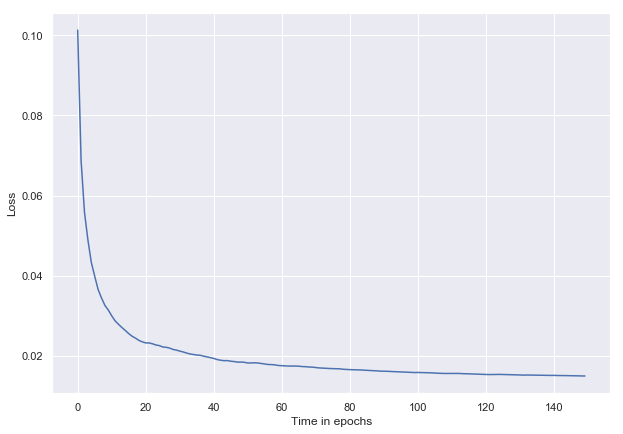

In [8]:
import sys
from io import StringIO

# capture output
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

# establishing the network
perceptron = Perceptron(shuffle=True, verbose=True, n_iter=150)
perceptron.fit(x_train, y_train)

# capture output
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
    
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

In [9]:
y_predict = perceptron.predict(x_test)

In [12]:
print("Train Set Accuracy: {0:.5f}%".format(perceptron.score(x_train, y_train)))
print("Test  Set Accuracy: {0:.5f}%".format(perceptron.score(x_test, y_test)))

Train Set Accuracy: 0.98633%
Test  Set Accuracy: 0.98182%
